In [2]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw, rdDistGeom
from rdkit import RDLogger
RDLogger.logger().setLevel(RDLogger.CRITICAL)

Create molecule

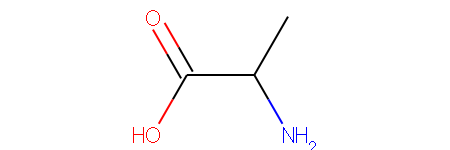

In [3]:
ala = Chem.MolFromSmiles( 'CC(C(=O)O)N' )
ala

In [4]:
Chem.MolToMolBlock(ala)

'\n     RDKit          2D\n\n  6  5  0  0  0  0  0  0  0  0999 V2000\n    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5981   -1.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    3.8971    0.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.2990    2.2500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\n  2  3  1  0\n  3  4  2  0\n  3  5  1  0\n  2  6  1  0\nM  END\n'

In [5]:
Chem.MolToSmiles(ala)

'CC(N)C(=O)O'

In [6]:
Chem.MolToInchi(ala)

'InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5,6)'

Geometry optimization

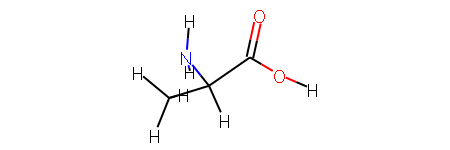

In [7]:
ala = Chem.MolFromSmiles( 'CC(C(=O)O)N' )
alaH = Chem.AddHs(ala)
rdDistGeom.EmbedMolecule(alaH)
alaH

In [8]:
ff = AllChem.UFFGetMoleculeForceField(alaH)
ff.CalcEnergy()

30.877135098196565

In [9]:
AllChem.UFFOptimizeMolecule(alaH)
ff.CalcEnergy()

13.281048187832674

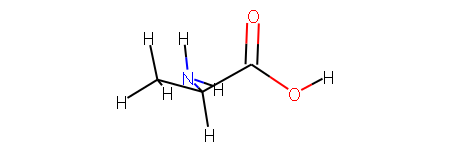

In [10]:
alaH

Descriptors, Fingerprints

In [11]:
from rdkit.Chem import Descriptors
from rdkit.Chem.Fingerprints import FingerprintMols

In [12]:
Descriptors.MolWt(alaH), Descriptors.MolLogP(alaH), Descriptors.RingCount(alaH), Descriptors.TPSA(alaH)

(89.09399999999998, -0.5817999999999999, 0, 63.31999999999999)

Database

C:\ProgramData\Anaconda3\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


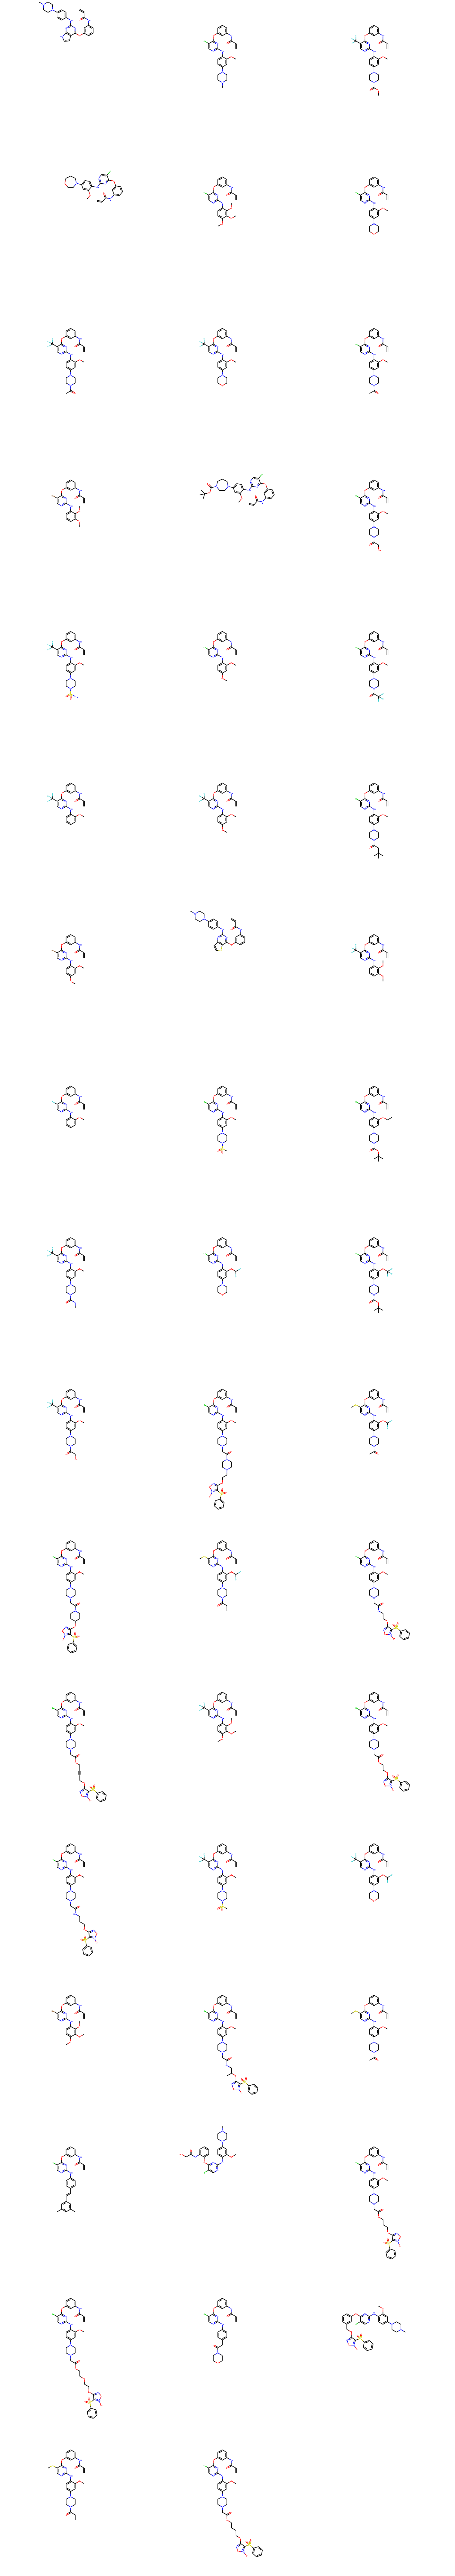

In [13]:
db_egfr = Chem.SDMolSupplier( '../data/egfr/ChEMBL27_EGFR_aminopyridine.sdf' )
mols_egfr = [ x for x in db_egfr if x is not None ]

Draw.MolsToGridImage( mols_egfr, molsPerRow=3, subImgSize=(500,500) )

Substructure search

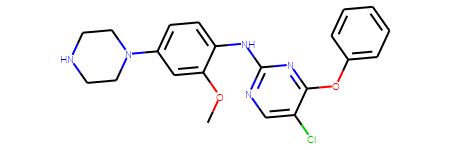

In [14]:
smiles = 'COc1cc(ccc1Nc1ncc(Cl)c(Oc2ccccc2)n1)N1CCNCC1'
query = Chem.MolFromSmiles( smiles )
AllChem.Compute2DCoords(query)
query

Found =  70  from  306


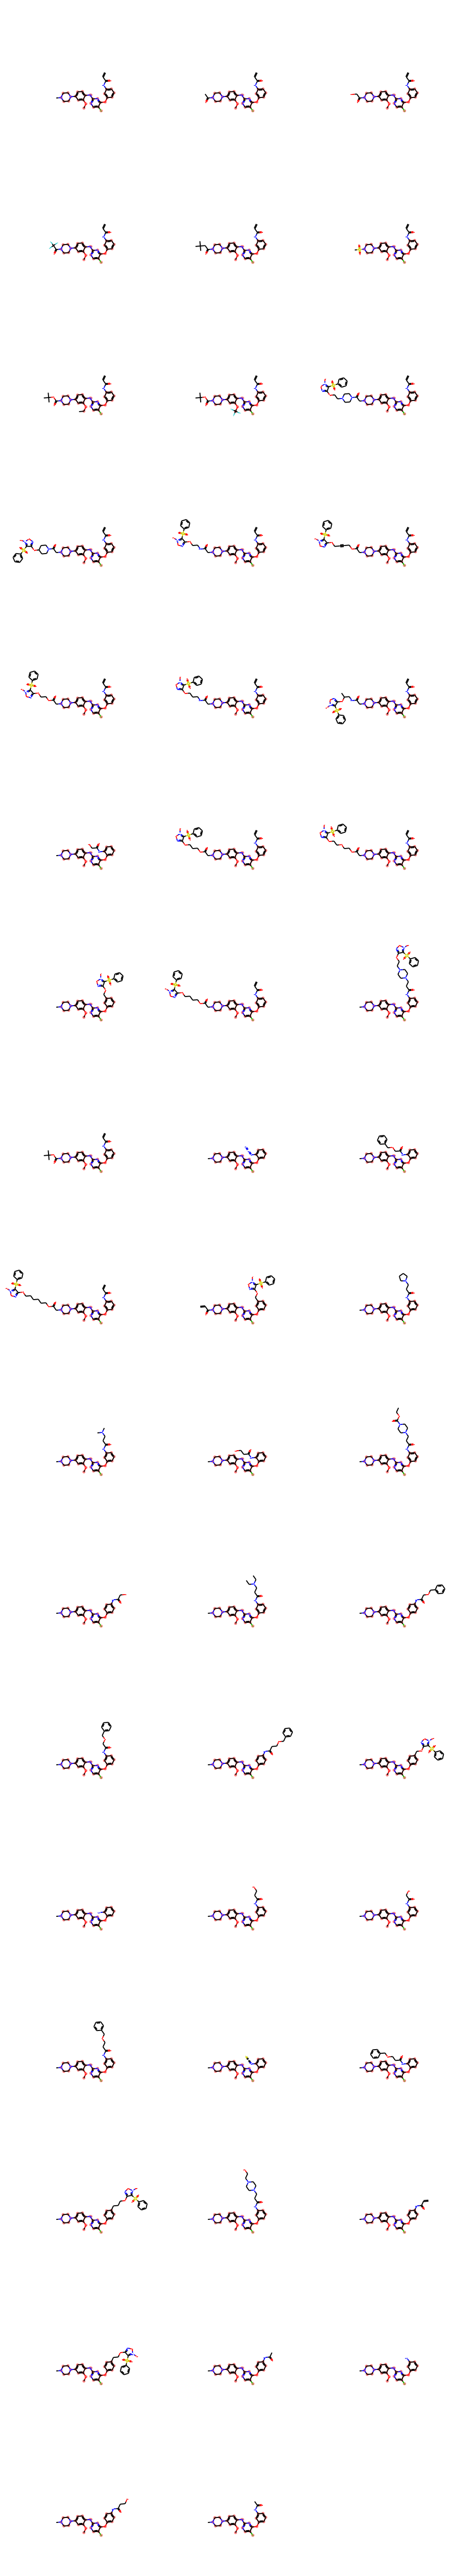

In [15]:
result = [ x for x in db_egfr if x.HasSubstructMatch(query) ]
print( "Found = ", len( result ), " from ", len( db_egfr ) )
for m in result:
    AllChem.GenerateDepictionMatching2DStructure( m, query )

Draw.MolsToGridImage( result[:], molsPerRow=3, subImgSize=(300,300), highlightAtomLists=[ m.GetSubstructMatch(query) for m in result ]  )

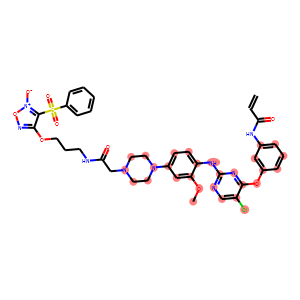

In [16]:
found = result[13]
found.GetSubstructMatch(query)
#found
Chem.Draw.MolToImage(found, highlightAtoms=found.GetSubstructMatch(query), highlightColor=[0.5,0,0.5]) 

MCS

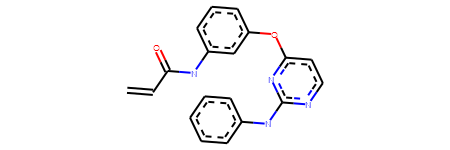

In [17]:
from rdkit.Chem import rdFMCS

mols_sub = mols_egfr[:10]
mcsf = rdFMCS.FindMCS( mols_sub )
mcs = Chem.MolFromSmarts( mcsf.smartsString )
mcs

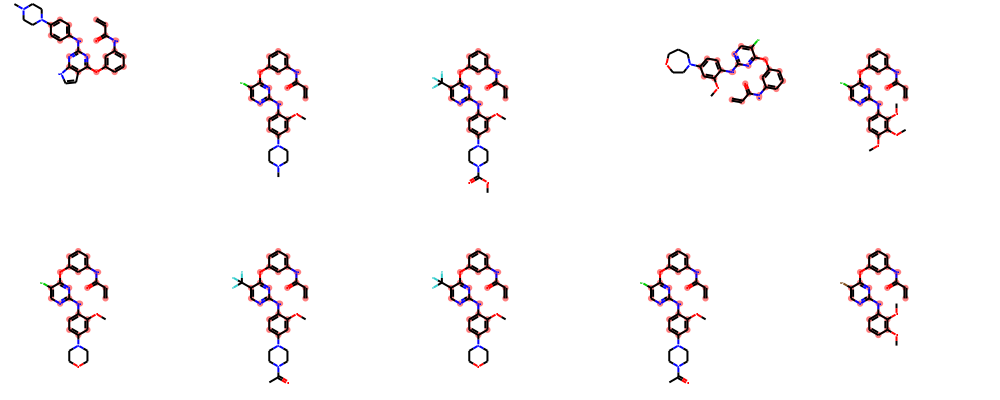

In [18]:
Draw.MolsToGridImage( mols_sub, molsPerRow=5, subImgSize=(200,200), highlightAtomLists=[ m.GetSubstructMatch(mcs) for m in mols_sub ] )

R-Group decomposition

50 0
[{'Core': 'c1cc([*:5])c([*:4])c([*:3])c1Nc1nc([*:2])c([*:1])c([*:6])n1', 'R1': 'c(c:[*:1])[nH]:[*:2]', 'R2': 'c(c:[*:1])[nH]:[*:2]', 'R3': '[H][*:3]', 'R4': '[H][*:4]', 'R5': 'CN1CCN([*:5])CC1', 'R6': 'C=CC(=O)Nc1cccc(O[*:6])c1'}, {'Core': 'c1cc([*:5])c([*:4])c([*:3])c1Nc1nc([*:2])c([*:1])c([*:6])n1', 'R1': 'Cl[*:1]', 'R2': '[H][*:2]', 'R3': 'CO[*:3]', 'R4': '[H][*:4]', 'R5': 'CN1CCN([*:5])CC1', 'R6': 'C=CC(=O)Nc1cccc(O[*:6])c1'}, {'Core': 'c1cc([*:5])c([*:4])c([*:3])c1Nc1nc([*:2])c([*:1])c([*:6])n1', 'R1': 'FC(F)(F)[*:1]', 'R2': '[H][*:2]', 'R3': 'CO[*:3]', 'R4': '[H][*:4]', 'R5': 'COC(=O)N1CCN([*:5])CC1', 'R6': 'C=CC(=O)Nc1cccc(O[*:6])c1'}]


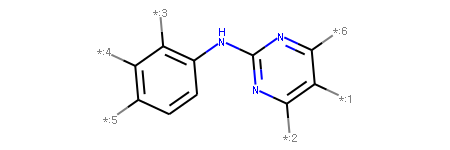

In [19]:
from rdkit.Chem import rdRGroupDecomposition as rdRGD

mcsf = rdFMCS.FindMCS( mols_egfr )
mcs = Chem.MolFromSmarts( mcsf.smartsString )

matched,unmatched = rdRGD.RGroupDecompose([mcs],mols_egfr[:50],asSmiles=True)
print( len(matched), len(unmatched) )
print( matched[:3] )
Chem.MolFromSmiles( matched[0]['Core'])

Fingerprints

{191: ((3, 1),), 378: ((6, 0), (10, 0)), 389: ((0, 2),), 448: ((7, 2), (9, 2)), 491: ((4, 1),), 703: ((2, 2), (11, 2)), 1088: ((1, 1), (8, 1), (0, 1), (12, 1)), 1152: ((4, 0),), 1199: ((1, 2), (12, 2)), 1380: ((3, 0), (5, 0)), 1452: ((6, 1), (10, 1)), 1524: ((3, 2),), 1582: ((5, 1),), 1586: ((4, 2),), 1619: ((5, 2),), 1750: ((2, 1), (11, 1)), 1819: ((6, 2), (10, 2)), 1866: ((7, 1), (9, 1), (8, 2)), 1873: ((0, 0), (1, 0), (2, 0), (7, 0), (8, 0), (9, 0), (11, 0), (12, 0))}


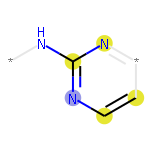

In [20]:
m = Chem.MolFromSmiles( Chem.MolToSmiles(mcs) )
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(m, radius=2, bitInfo=bi)
print( bi )
Draw.DrawMorganBit(m, 1819, bi)

Fingerprint similarity map

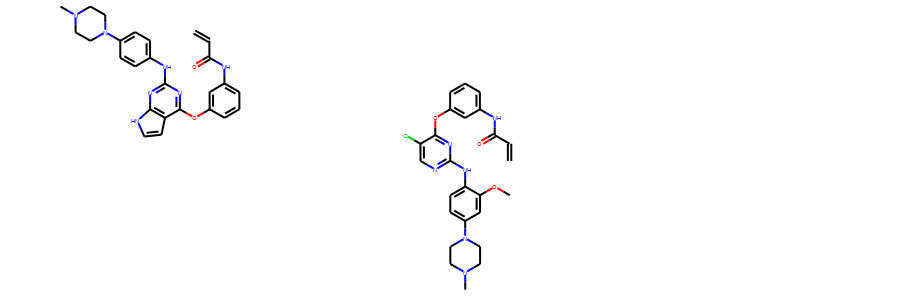

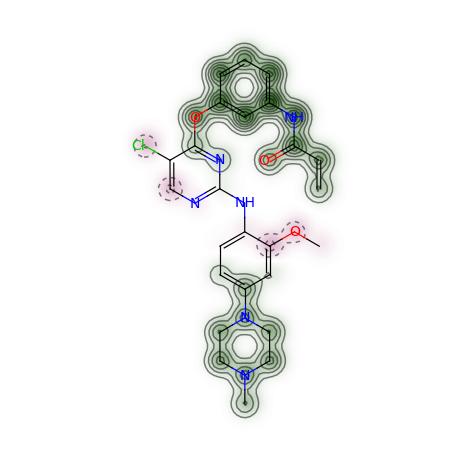

In [21]:
from rdkit.Chem.Draw import SimilarityMaps

ref = mols_sub[0]
mol = mols_sub[1]
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint( ref, mol, SimilarityMaps.GetMorganFingerprint )
Draw.MolsToGridImage( [ref, mol], molsPerRow=3, subImgSize=(300,300) )

Fingerprint similarity search

In [22]:
fps = [ FingerprintMols.FingerprintMol(m) for m in mols_egfr ]
fp_ref = fps[1]
for i in range(len(fps)):
    print( "%5.2f" % ( DataStructs.FingerprintSimilarity( fp_ref, fps[i] ) ) ) 

 0.65
 1.00
 0.75
 0.88
 0.80
 0.93
 0.77
 0.73
 0.96
 0.71
 0.84
 0.95
 0.72
 0.85
 0.92
 0.69
 0.68
 0.91
 0.72
 0.61
 0.67
 0.73
 0.88
 0.88
 0.76
 0.89
 0.87
 0.76
 0.63
 0.77
 0.61
 0.75
 0.64
 0.63
 0.66
 0.63
 0.64
 0.71
 0.71
 0.68
 0.62
 0.79
 0.73
 0.85
 0.63
 0.63
 0.70
 0.60
 0.77
 0.63
 0.76
 0.63
 0.90
 0.83
 0.57
 0.76
 0.81
 0.81
 0.63
 0.60
 0.75
 0.76
 0.92
 0.94
 0.74
 0.84
 0.88
 0.87
 0.73
 0.92
 0.93
 0.86
 0.90
 0.85
 0.61
 0.89
 0.95
 0.96
 0.89
 0.83
 0.80
 0.61
 0.92
 0.95
 0.61
 0.93
 0.95
 0.58
 0.91
 0.98
 0.97
 0.87
 0.90
 0.83
 0.92
 0.95
 0.87
 0.85
 0.91
 0.85
 0.88
 0.87
 0.91
 0.92
 0.81
 0.85
 0.88
 0.87
 0.88
 0.91
 0.50
 0.49
 0.49
 0.52
 0.50
 0.47
 0.48
 0.44
 0.53
 0.49
 0.50
 0.51
 0.46
 0.49
 0.50
 0.50
 0.49
 0.51
 0.51
 0.47
 0.52
 0.52
 0.49
 0.51
 0.49
 0.51
 0.50
 0.50
 0.43
 0.51
 0.44
 0.51
 0.51
 0.50
 0.51
 0.49
 0.50
 0.50
 0.43
 0.56
 0.51
 0.48
 0.52
 0.51
 0.44
 0.50
 0.53
 0.52
 0.52
 0.53
 0.52
 0.51
 0.48
 0.51
 0.51
 0.51
 0.5

Fingerprint descriptors map

Charges =  [-0.09358991854301577, -0.003956975576191903, 0.24726456668062793, -0.2696480622101046, -0.3223931149276884, 0.04467408980828689, -0.038251682852486216, -0.05649333244031857, -0.01907771727455852, 0.13110971938310126, -0.4380416880747996, 0.23311161342544373, -0.17606141665813105, 0.23205251307006627, -0.32402056589798, 0.04102571212272887, -0.036468671449766385, -0.0366908199292375, 0.03681005589562408, -0.3689647154567249, 0.030576547955533273, 0.01554920108912078, -0.3028559431986506, -0.013239811541794776, 0.01554920108912078, 0.030576547955533273, -0.0366908199292375, -0.036468671449766385, -0.19443948118529558, 0.1463553925152271, -0.3458645436988424, 0.0033924515283658254, -0.029609010346172172, 0.08147895710961545, 0.004446080210662932]
(LogP, MR) =  [(0.1551, 3.513), (0.1551, 3.513), (-0.2783, 5.007), (-0.1526, 0.0), (-0.5188, 3.0), (0.4619, 4.067), (0.1581, 3.35), (0.1581, 3.35), (0.1581, 3.35), (0.5437, 3.853), (-0.4195, 1.182), (0.5437, 3.853), (-0.3239, 2.202), 

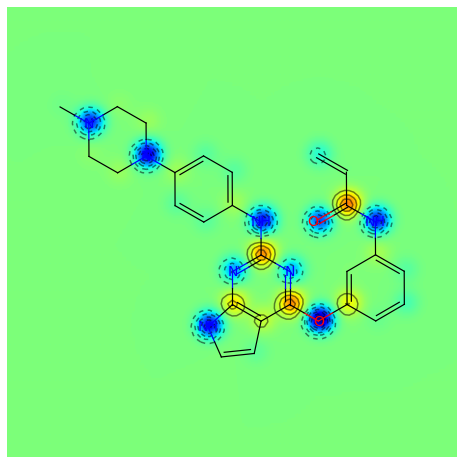

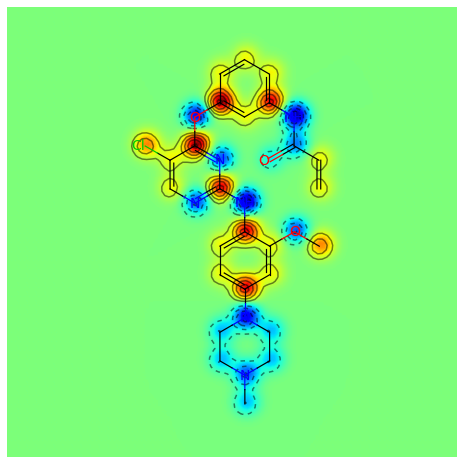

In [23]:
from rdkit.Chem import rdMolDescriptors

m = mols_sub[0]
AllChem.ComputeGasteigerCharges(m)
charges = [ m.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(m.GetNumAtoms()) ]
logp = rdMolDescriptors._CalcCrippenContribs(m)
print( "Charges = ", charges )
print( "(LogP, MR) = ", logp )

_ = SimilarityMaps.GetSimilarityMapFromWeights(m, charges, colorMap='jet', contourLines=10)
_ = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in logp], colorMap='jet', contourLines=10)

Reactions

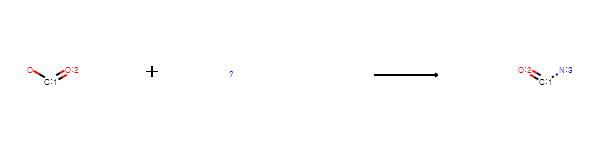

In [24]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
rxn

2


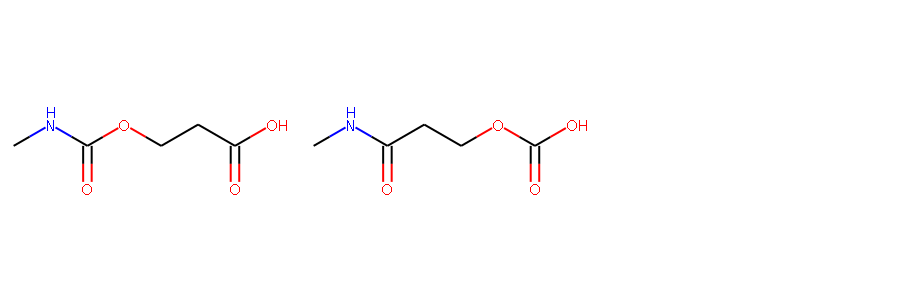

In [25]:
ps = rxn.RunReactants((Chem.MolFromSmiles('C(COC(=O)O)C(=O)O'),Chem.MolFromSmiles('NC')))
print( len(ps) )
Draw.MolsToGridImage( [ ps[0][0], ps[1][0] ], molsPerRow=3, subImgSize=(300,300) )

RECAP

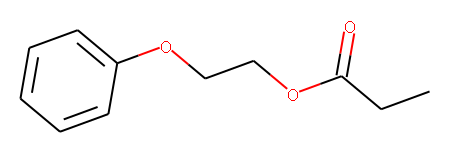

In [26]:
from rdkit.Chem import Recap
m = Chem.MolFromSmiles('c1ccccc1OCCOC(=O)CC')
hierarch = Recap.RecapDecompose(m)
hierarch.mol

In [27]:
ks=hierarch.children.keys()
ks

dict_keys(['*C(=O)CC', '*OCCOc1ccccc1', '*c1ccccc1', '*CCOC(=O)CC', '*CCOc1ccccc1'])